In [25]:
 import tensorflow.keras as tf 
 import matplotlib.pyplot as plt 
 import seaborn as sns 
 import numpy as np 
 import cv2  
 from tensorflow.keras.layers import Conv2D, UpSampling2D, MaxPooling2D
 from tensorflow.keras.models import Sequential

In [3]:
# We don't need a y in this case
(x_train, y_train), (x_test, y_test) = tf.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(f"Number of training data : {len(x_train)}" )
print(f"Number of testing data : {len(x_test)}" )

Number of training data : 60000
Number of testing data : 10000


In [15]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [16]:
# Normalizing the input data or standardizing the input data
x_train = x_train / 255.0
x_test = x_test /255.0


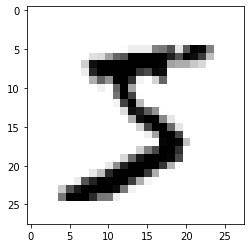

In [37]:
plt.imshow(x_train[0].reshape(28, 28), cmap = 'binary')

In [21]:
# We are trying to lower the precision, because it helps us to store the model with a lesser storage space
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [44]:
#adding some noise
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=0.5, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=0.5, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

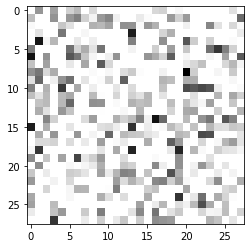

In [45]:
## Image of 5 after applying a noise to that image
plt.imshow(x_train_noisy[0].reshape(28, 28), cmap = 'binary')

In [26]:
# Encoder Layer
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 
# Code Layer
model.add(MaxPooling2D((2, 2), padding='same'))

# Decoder Layer
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

# Passing x_train as a x and as well as y and reducing the reconstruction error by calculating the
# reconstruction image - image
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [30]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.7525e-06


1.752527964526962e-06

In [31]:
y_pred = model.predict(x_test_noisy)

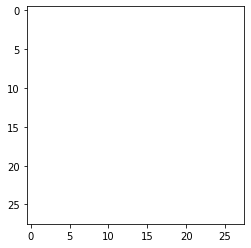

In [36]:
plt.imshow(y_pred[0].reshape(28 ,28), cmap = 'binary')

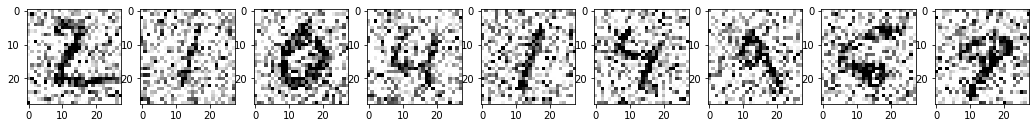

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)         

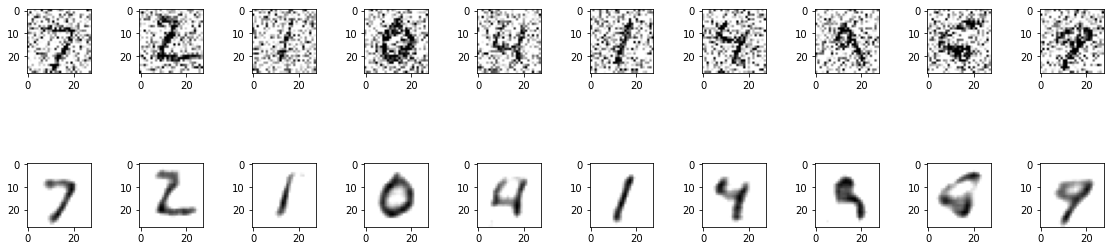

In [46]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))



model.evaluate(x_test_noisy, x_test)

model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()
